In [1]:
import os
import pandas as pd
import numpy as np
import random
import math
from decimal import Decimal

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt

In [2]:
# Visualize  

def accurayPlot(x, y): 
    fig, ax = plt.subplots()
    ax.scatter(x, y, edgecolors=(0,0,0))
    ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--')
    ax.set_xlabel('Actual value')
    ax.set_ylabel('Predicted')
    plt.show()

In [3]:
path = 'D:/Bioinformatics/Diplom/'
file = 'RawData_200.csv'
dfRawData200 = pd.read_csv(path+'ML/ '+file)

file = 'RawData_45.csv'
dfRawData45 = pd.read_csv(path+'ML/ '+file)

dfAllRD = dfRawData200
dfAllRD = dfAllRD.append(dfRawData45, ignore_index=True)
dfAllRD.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
0,0,1atx_,46,839,21.2,-1.500708,-58.865890,57.365182
1,1,1agg_,48,851,22.2,-1.797210,-60.767012,58.969802
2,2,1akhA,49,925,22.4,-5.642586,-53.350390,47.707804
3,3,1afp_,51,961,22.8,-5.542472,-72.049554,66.507082
4,4,1apq_,53,946,25.3,-3.719619,-62.522390,58.802771


In [7]:
dfAllRD[dfAllRD.L == 550.1807073071892]

,Unnamed: 0,name,Length,X1,X2,E,S,L
239,39,1nd7,374,7248,74.8,83.189263,-466.991445,550.180707


In [10]:
dfAllRD = dfAllRD.drop(dfAllRD.index[239])
dfAllRD[dfAllRD.L == 550.1807073071892]

,Unnamed: 0,name,Length,X1,X2,E,S,L


In [11]:
len(dfAllRD)

244

In [12]:
# Normalize and transform the values for the two parameters (X1 - seq, and X2 - pattern)

t1 = Normalizer().fit([dfAllRD.X1])
x1 = t1.transform([dfAllRD.X1])

t2 = Normalizer().fit([dfAllRD.X2])
x2 = t1.transform([dfAllRD.X2])

In [13]:
# Create a DF for the parameters
dfData = pd.DataFrame()
dfData["x1"] = x1[0]
dfData["x2"] = x2[0]

# Actual values (Y)
E = dfAllRD.E
L = dfAllRD.L

In [14]:
# Lasso
model = linear_model.Lasso(alpha=0.1)

0.22501768544601386
[ 0.21459803 -1.0015935   0.09454093]


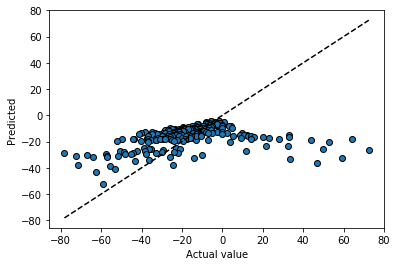

{'fit_time': array([0.        , 0.        , 0.01011705]), 'score_time': array([0., 0., 0.]), 'test_score': array([ 0.21459803, -1.0015935 ,  0.09454093]), 'train_score': array([0.21024688, 0.22898726, 0.3535411 ])}


In [15]:
# E
model.fit(dfData, E.tolist())
print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

In [16]:
cvResults['fit_time']

array([0.        , 0.        , 0.01011705])

0.32962202072129176
[-1.91911847 -0.10328879 -0.22741632]


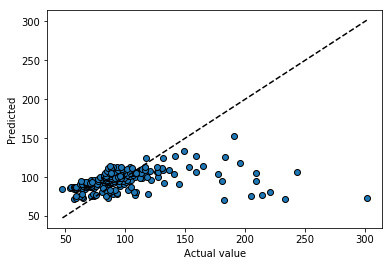

{'fit_time': array([0., 0., 0.]), 'score_time': array([0.        , 0.        , 0.01006126]), 'test_score': array([-1.91911847, -0.10328879, -0.22741632]), 'train_score': array([0.18502815, 0.35436147, 0.45715147])}


In [17]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)

In [18]:
# 1.4.2. Regression (Support Vector Machines)
model = svm.LinearSVR()

[-1.45217857e+00 -1.77097536e+00 -1.55910730e-04]


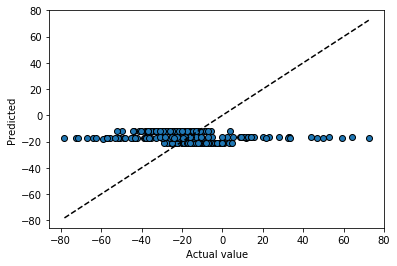

{'fit_time': array([0., 0., 0.]), 'score_time': array([0., 0., 0.]), 'test_score': array([-1.44596940e+00, -1.69792656e+00, -2.17095454e-04]), 'train_score': array([ 0.0052612 ,  0.0094974 , -0.00256496])}


In [19]:
# E
#model.fit(dfData, E.tolist())
#print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

-0.18722217828916676
[-0.8517852  -2.11978577 -1.02478071]


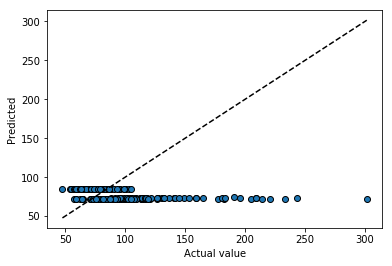

{'fit_time': array([0.        , 0.01004481, 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([-0.85168968, -2.11990689, -1.02478071]), 'train_score': array([-0.32996003, -0.35998799, -0.41887824])}


In [20]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)

In [21]:
# 1.6.3. Nearest Neighbors Regression
# E
model = KNeighborsRegressor(n_neighbors=2)

[-3.20348464 -8.86825064  0.05778803]


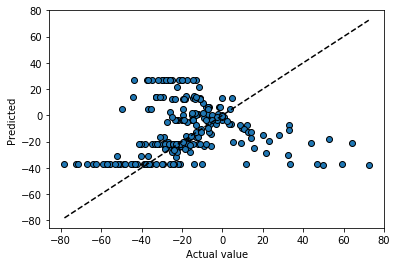

{'fit_time': array([0., 0., 0.]), 'score_time': array([0., 0., 0.]), 'test_score': array([-3.20348464, -8.86825064,  0.05778803]), 'train_score': array([0.82879353, 0.83116934, 0.81865827])}


In [22]:
# E
#model.fit(dfData, E.tolist())
#print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

0.8794005766122739
[-0.937697   -2.35091512 -0.58044282]


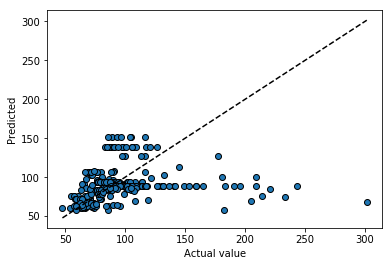

{'fit_time': array([0., 0., 0.]), 'score_time': array([0.01006269, 0.        , 0.        ]), 'test_score': array([-0.937697  , -2.35091512, -0.58044282]), 'train_score': array([0.85555247, 0.904925  , 0.82778265])}


In [23]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)

In [24]:
# 1.10.2. Regression - Decisiion Tree  Regresion 
# E
model = tree.DecisionTreeRegressor()

[ -4.97581139 -27.59923106  -0.57057447]


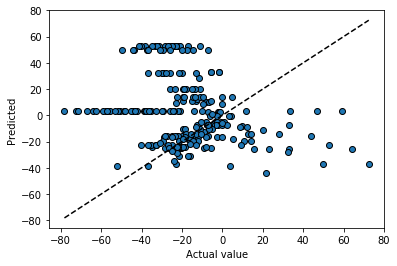

{'fit_time': array([0., 0., 0.]), 'score_time': array([0., 0., 0.]), 'test_score': array([ -5.28705419, -31.38110351,  -0.59680254]), 'train_score': array([1., 1., 1.])}


In [25]:
# E
#model.fit(dfData, E.tolist())
#print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

1.0
[-2.99609937 -3.40497145 -0.71595667]


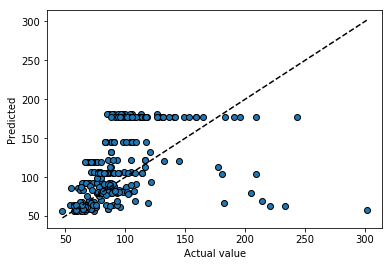

{'fit_time': array([0., 0., 0.]), 'score_time': array([0., 0., 0.]), 'test_score': array([-2.97758978, -2.41893691, -0.75233806]), 'train_score': array([1., 1., 1.])}


In [26]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)